In [1]:
from models import *
from sort_OSPE_output import *
pd.set_option('display.max_rows', None)
plt.rcParams["font.family"] = "Times New Roman"

sorting files...
21 / 202 didn't survive (Roche lobe overflow)
0 / 202 didn't survive (in perturber Roche lobe)
21 / 202 evolved to e1<1e-5
156 / 202 survived
4 / 202 produced error
['Run6/Output/output_234.txt', 'Run6/Output/output_106.txt', 'Run6/Output/output_188.txt', 'Run6/Output/output_80.txt']
of the ones that survived:
33 / 156  unfinished
123 / 156  finished without error
average time of unfinished files: 1417867185.1308765
0  systems matching observations


In [2]:
np.array(unfinished_numbers)

array([157, 180,  58, 142,  66, 169, 155, 179,  63, 153,  10, 126,  15,
       127,  17,  32,  30,  19, 117,  34, 138, 110,  37, 105,  93,  51,
        47,  85, 160, 167, 173, 198,  41])

In [5]:
m=Model(2110)

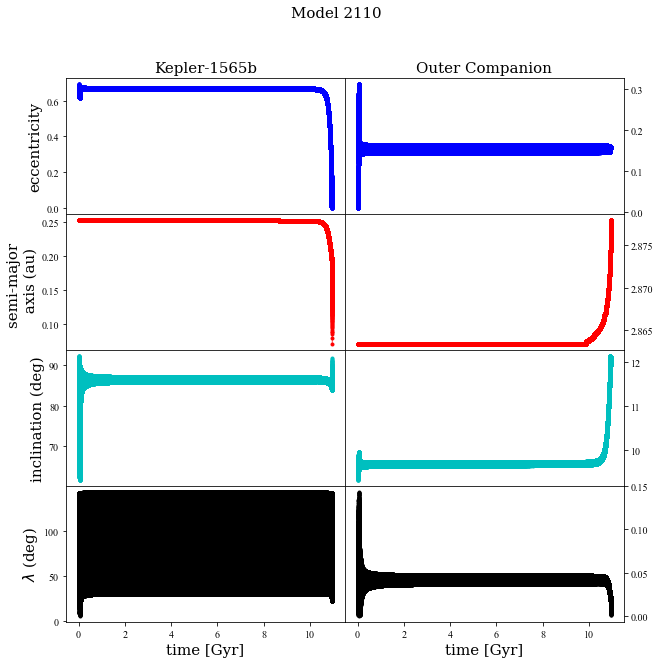

In [6]:
m.plot_timeseries()

Text(0.5, 0.98, 'Model X')

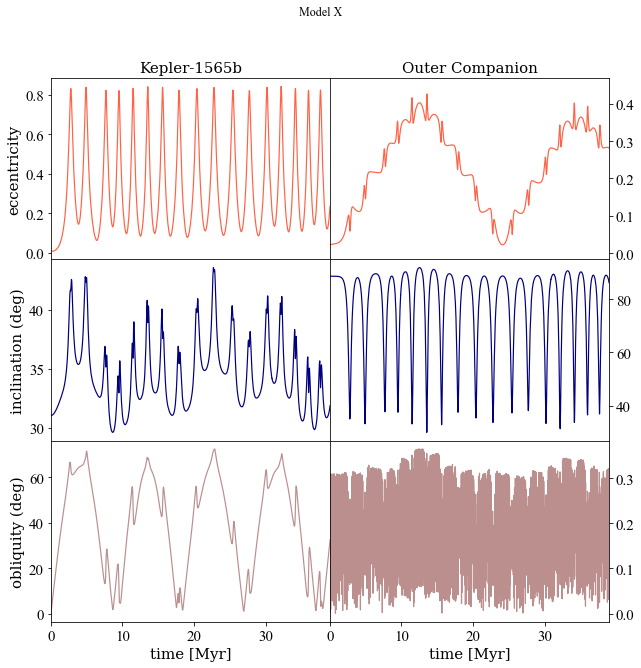

In [12]:
m=Model(277)
fig,ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].plot(m.time/1e6,m.e1,'tomato', marker='',linewidth=1.2,alpha=1.0)
ax[0,0].set_ylabel('eccentricity',fontsize=15,family='serif')
ax[0,0].set_title('Kepler-1565b',fontsize=15,family='serif')
ax[0,1].plot(m.time/1e6,m.e2,'tomato', marker='',linewidth=1.2,alpha=1.0)
ax[0,1].set_title('Outer Companion',fontsize=15,family='serif')

ax[1,0].plot(m.time/1e6,m.i1,'navy', marker='',linewidth=1.2,alpha=1.0)
ax[1,0].set_ylabel('inclination (deg)',fontsize=15,family='serif')
ax[1,1].plot(m.time/1e6,m.i2,'navy', marker='',linewidth=1.2,alpha=1.0)

ax[2,0].plot(m.time/1e6,m.beta1,'rosybrown', marker='',linewidth=1.2,alpha=1.0)
ax[2,0].set_ylabel('obliquity (deg)',fontsize=15,family='serif')
ax[2,0].set_xlabel('time [Myr]',fontsize=15,family='serif')
ax[2,1].plot(m.time/1e6,m.beta2,'rosybrown', marker='',linewidth=1.2,alpha=1.0)
ax[2,1].set_xlabel('time [Myr]',fontsize=15,family='serif')

# remove space between panels
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)

# remove offset labels for sma
ax[1,0].ticklabel_format(useOffset=False)
ax[1,1].ticklabel_format(useOffset=False)

# move outer planet ticks to the right
for ax_i in ax[:,1]:
    ax_i.yaxis.tick_right()
    
ax[0,0].set_xticklabels([]);ax[0,1].set_xticklabels([])
ax[1,0].set_xticklabels([]);ax[1,1].set_xticklabels([])
    
for axes in ax:
    for ax_i in axes:
        ax_i.set_xlim(0,39)
        ax_i.tick_params(axis='both', which='major', labelsize=15)



In [15]:
starroche = np.transpose([int(i[19:-4]) for i in zeros]) # inner planet tidally disrupted by star
survived = np.transpose([int(i[19:-4]) for i in ones_and_twos])
planetroche = np.transpose([int(i[19:-4]) for i in threes]) # inner planet tidally disrupted by outer planet
failed = np.transpose([int(i[19:-4]) for i in negatives])

crashed = [63, 4, 53, 60, 156, 198, 135, 132, 103, 10, 11, 108, 174, 200, 35, 6, 56]

In [16]:
# time series of planet that survived
for n in survived:
    m=Model(n)
    if m.e1[-1]>0.6:
        print(n)
        
Model(177).plot_timeseries()

FileNotFoundError: [Errno 2] File Run5/Output/output_1.txt does not exist: 'Run5/Output/output_1.txt'

In [16]:
# time series of planet that survived
for n in starroche:
    m=Model(n)
    e=m.e1[-1]
    a=m.a1[-1]
    if abs(e-0.84)<0.2:
        if abs(a-0.2)<0.1:
            print(n)
            


147
284
111
176
373


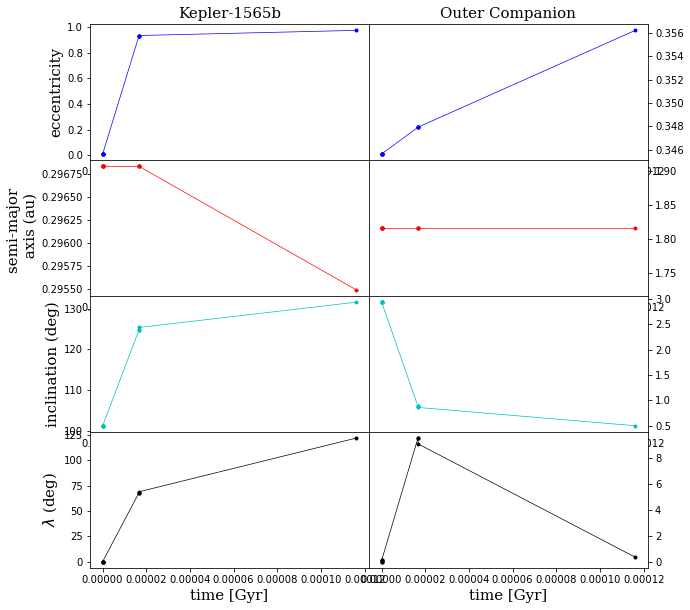

In [13]:
# time series of planet that was disrupted by companion
Model(373).plot_timeseries()